<a href="https://colab.research.google.com/github/cbsebastian24/Trex/blob/main/Copy_of_TZ_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T-test vs z-test effect under small size n

In this notebook, we investigate type I errors of the t-test and the z-test in the case of a small sample size.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Function to generate iid 1D data
def generate_data(n, dist="normal", mean=0, scale=1):
    """
    Generate iid samples from one of several distributions.
    """
    if dist == "normal":
        return np.random.normal(mean, scale, size=n)
    elif dist == "laplace":
        return np.random.laplace(mean, scale, size=n)
    elif dist == "exponential":
        return np.random.exponential(scale, size=n) - scale  # centered
    else:
        raise ValueError("Distribution must be 'normal', 'laplace', or 'exponential'.")

**Question 1:** Plot and visualize the normal, laplace, and exponential distribution. Use data from the cell below as a starting point. What is your observation? which data distribution do you think that will cause the t-test and the z-test to "struggle" on?

In [3]:
np.random.seed(0)
sample_size = 10000
data = dict()
for dist in ["normal", "laplace", "exponential"]:
    data[dist] = generate_data(sample_size, dist=dist)

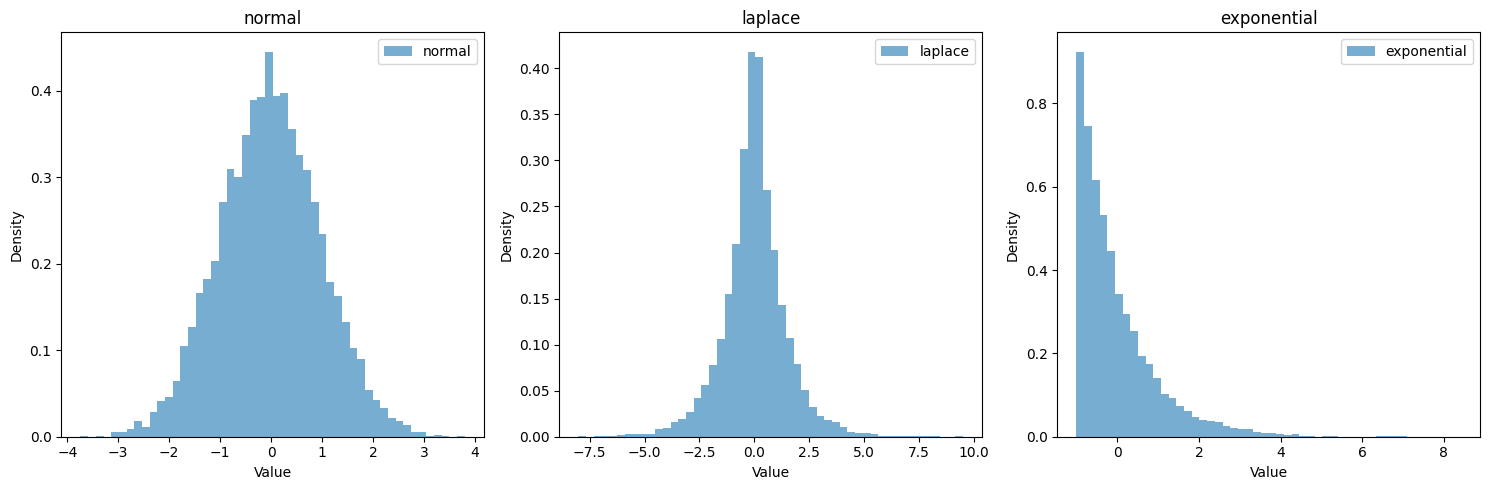

In [12]:
# TO-DO: plots the data above to visualize the normal, laplace, and exponential distribution, under standard parameters.
plt.figure(figsize=(15, 5))
for i, dist in enumerate(data):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[dist], bins=50, density=True, alpha = 0.6, label = dist)
    plt.title(dist)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
plt.tight_layout()
plt.show()

#
#
#
#

**Question 2:** Using the provided code as a starting point, complete the t_test and the z_test functions that returns `True` if the null is rejected, and `False` if you fail to reject it. Hints: treat data as a 1D Numpy array, hence you are allowed to use `np.mean(data)` as well as `np.std(data, ddof=1)` to calculate the mean and std of data. Test your function using the generated data `data` to make sure that it works.

In [47]:
# Define test functions
def t_test(data, mu0=0, alpha=0.05):
    """
    Two-sided t-test for mean = mu0
    Returns True if null is rejected
    """
    # TO-DO: complete the function
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(len(data))
    t_stat = (mean - mu0) / (se)
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), len(data) - 1))
    if p_value < alpha:
        return True
    else:
        return False



def z_test(data, mu0=0, alpha=0.05):
    """
    Two-sided z-test for mean = mu0.
    Uses sample std to aproximate the variance.
    """
    # TO-DO: complete the function
    pass
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = std / np.sqrt(len(data))
    z_stat = (mean - mu0) / (std / se)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    if p_value < alpha:
        return True
    else:

        return False

In [54]:
# TO-DO: run your two functions on generated data

np.random.seed(0)
data = generate_data(100, dist="normal")
print(t_test(data, mu0=0, alpha=0.05))
print(z_test(data, mu0=0, alpha=0.05))

#
#
#
#
#

False
False


**Question 3:** Complete the following function that runs the simulation to estimate Type I error. The function should generate data multiple times with size `n`, conduct testing against the null mean, and keep tract of the number of the time that the test turns out `True` (when we wrongly reject the null). Then, the function should return the ratio of outputing `True` as an "Empirical Type I error" that estimates Type I error. Make good use of the functions `t_test` and `z_test` that you have defined!

In [56]:
# Simulation function to estimate Type I error
def empirical_type1_error(n=10, dist="normal", alpha=0.05, n_sim=10000):
    """
    Repeat hypothesis testing under true mean = 0 and record empirical Type I error.
    """
    # TO-DO: complete the function
    type1_error_count = 0
    for i in range(n_sim):
        data = generate_data(n, dist=dist)
        if t_test(data, mu0=0, alpha=alpha): # Assuming t-test for all distributions as per earlier cells
            type1_error_count += 1
    return type1_error_count / n_sim

**Question 4:** Run the experiment using the function that you have defined in **Question 3**, with the followings parameters. Keep track of the outputs; we will be plotting them in the next question.

In [59]:
# Run experiment for different distributions
np.random.seed(0)
n_sim = 10000
alpha = 0.05
sample_sizes = [5, 10, 15, 20, 25, 30]
distributions = ["normal", "laplace", "exponential"]

# TO-DO: run the experiments using 2 for loops to loop over
#        the two lists of sample_sizes and distributions provided
results = {}
for n in sample_sizes:
    for dist in distributions:
        results[(n, dist)] = empirical_type1_error(n, dist, alpha, n_sim)
        print(f"n = {n}, dist = {dist}")
        print(f"Empirical Type I error: {empirical_type1_error(n, dist, alpha, n_sim)}")
#
#
#

n = 5, dist = normal
Empirical Type I error: 0.0498
n = 5, dist = laplace
Empirical Type I error: 0.0319
n = 5, dist = exponential
Empirical Type I error: 0.12
n = 10, dist = normal
Empirical Type I error: 0.0532
n = 10, dist = laplace
Empirical Type I error: 0.045
n = 10, dist = exponential
Empirical Type I error: 0.0963
n = 15, dist = normal
Empirical Type I error: 0.0512
n = 15, dist = laplace
Empirical Type I error: 0.0479
n = 15, dist = exponential
Empirical Type I error: 0.0861
n = 20, dist = normal
Empirical Type I error: 0.0523
n = 20, dist = laplace
Empirical Type I error: 0.0482
n = 20, dist = exponential
Empirical Type I error: 0.0801
n = 25, dist = normal
Empirical Type I error: 0.0462
n = 25, dist = laplace
Empirical Type I error: 0.045
n = 25, dist = exponential
Empirical Type I error: 0.0768
n = 30, dist = normal
Empirical Type I error: 0.049
n = 30, dist = laplace
Empirical Type I error: 0.0472
n = 30, dist = exponential
Empirical Type I error: 0.0714


In [60]:
results

{(5, 'normal'): 0.0467,
 (5, 'laplace'): 0.0309,
 (5, 'exponential'): 0.1132,
 (10, 'normal'): 0.0488,
 (10, 'laplace'): 0.0419,
 (10, 'exponential'): 0.0976,
 (15, 'normal'): 0.0524,
 (15, 'laplace'): 0.045,
 (15, 'exponential'): 0.088,
 (20, 'normal'): 0.0507,
 (20, 'laplace'): 0.0483,
 (20, 'exponential'): 0.0847,
 (25, 'normal'): 0.0544,
 (25, 'laplace'): 0.0473,
 (25, 'exponential'): 0.0796,
 (30, 'normal'): 0.0484,
 (30, 'laplace'): 0.0485,
 (30, 'exponential'): 0.0725}

**Question 5:** Using the appropriate plot, visuallize the results.

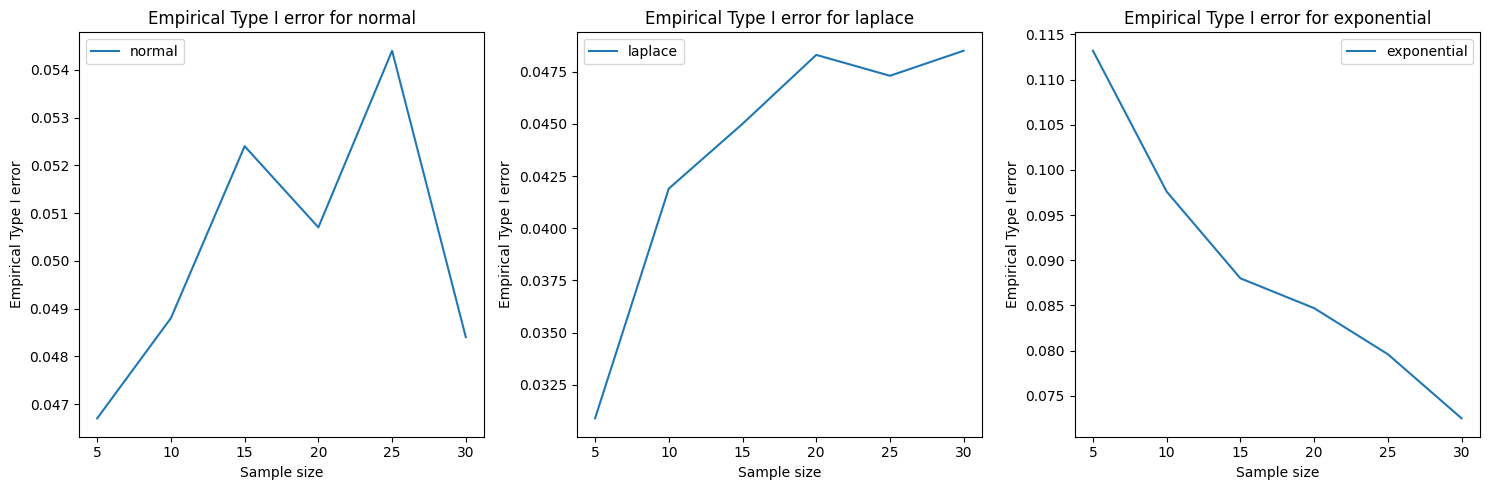

In [61]:
# TO-DO: visualize results
plt.figure(figsize=(15, 5))

for i, dist in enumerate(distributions):
    plt.subplot(1, 3, i + 1)
    plt.plot(sample_sizes, [results[(n, dist)] for n in sample_sizes], label=dist)
    plt.title(f"Empirical Type I error for {dist}")
    plt.xlabel("Sample size")
    plt.ylabel("Empirical Type I error")
    plt.legend()
plt.tight_layout()
plt.show()

#

**Question 6:** Comments on what you see based on the following questions:
* For which sample distribution and which test is Type I error correctly control?
The laplace distribution has the most controlled type 1 error.
* Which test does better in controlling Type I error? Why? Is this to be expected?
Laplace because it matches the t-test distribution the most. Not exactly since normal or laplace could be a match since the distribution is expected to be normal but i guess maybe since its true or false there was more variation then was expected meaning the laplace distribution ended up being the most accurate.
* Which sample distribution did the test methods have a hard time? Did you correctly guess this?
The exponential distribution which I correctly guessed.
* Is too much lower than the specified Type I error threshold a good thing? Why or why not? (hints: think power)

* What is the effect of `n` that you have seen? What does this imply for large `n`? Can you verify your guess with code?

**Optional question:** for those who are curious, re-do steps 4, 5, 6 above for an alternative value instead of the true value
to compare the powers between the testing methods.